In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from sympy import Symbol, cancel
import random as rd
plt=reload(plt)

## Исходная функция

In [9]:
def fn(x):
    return x**2 + np.sin(x)

## 1.1. Нормальные уравнения

Для построения многочлена МНК степени $n$ (то есть $a_0 + a_1x + \dots + a_n x^n$) рассмотрим
![image](./images/12.jpeg)
Из матана известно, что необходимым условием минимума $g(a_0,\dots,a_n)$ является условие

![image](./images/13.jpeg)

Собираем коэффициенты при $a_i$ и переписываем систему в матричном виде

![image](./images/10.jpeg)
которую можно снова переписать:

## $$E^T E a = E^T f$$
![image](./images/11.jpeg)

Важно: если хотя бы $n+1$ точки из $x_1,\dots,x_m$ различны  $\Rightarrow rang\;E = n+1 \Rightarrow$ у системы $\exists !$ решение $\Rightarrow \exists !$ точка минимума у $g(a_0,\dots,a_n) \Rightarrow$ у МНК $\exists !$ решение

In [10]:
def least_squares(a, b, m, poly_degree, figure=None, arg=None, show_info=None):
    rd.seed(0)
    fun_vals = []
    x, y = [], []
    interval = np.linspace(a, b, m)
    eps = 3
    # Генерируем приближенные значения функции f_i
    for i in interval:
        fun_vals.append(fn(i) + ((-1)*(rd.randint(0, 17))%5)*(-1)**(rd.randint(-1, 1)))
        x.append(i)

    x = np.array(x, float)    
    y = np.array(fun_vals, float)
    n = poly_degree # Степень полинома МНК    
    
    pts = len(x)
    polyval = []

    if n+1 > pts:
        print('Внимание: Степень многочлена должна быть меньше числа точек из входных данных')
        print('Проверьте правильность введенных данных')
        sys.exit()

    # Реализация МНК
    matrixA = np.zeros((pts, n + 1)) # матрица А (матрица Вандермонда E в обозначениях выше)
    matrixB = np.zeros((pts, 1)) # матрица В (f в обозначениях выше)
    
    for i in range(pts):
        matrixB[i][0] = y[i]
        for j in range(n + 1):
            matrixA[i][j] = (x[i])**j
    
    if m <= 3:
        print('matrixA:\n', matrixA)
        print('matrixB:\n', matrixB)
    
    # Нормальные уравнения (A^T) A x = (A^T) b
    At = np.transpose(matrixA) 
    AtA = np.dot(At, matrixA) 
    AtB = np.dot(At, matrixB) 
    coeff = np.linalg.solve(AtA, AtB) 
    
    for i in range(pts):
        yval = 0
        for j in range(n + 1):
            yval = yval + coeff[j, 0]*(x[i])**j 
        polyval.append(yval)
    
    error = y - polyval
    sumval = np.sum(error**2)
    stddev = (sumval/(pts - (n + 1)))**0.5
    
    # Коэффициенты корреляции
    ymean = np.sum(y)/pts
    sumfit = np.sum((y - ymean)**2)
    rvalue = ((sumfit - sumval)/sumfit)**0.5
    
    # Визуализация
    if figure == True and arg==None:
        plt.figure(figsize=(10, 7), dpi=70)
        plt.plot(x, y, 'ro', label='Входные данные')
        
        def approximation(ar):
            f = 0
            for i in range(len(coeff)):
                f += coeff[i] * ar**i
            return f
        
        plt.plot(x, approximation(x), 'b-', label='Аппроксимирующий полином МНК', linewidth = 3)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Полином степени ' + str(n))
        plt.legend(loc='best', )
    
        if show_info != None:
            print('\nСтепень многочлена: ', n)
            print('\nКоэффициенты многочлена:')
            num = 0
            for i in coeff.flatten():
                print('a_{0} = {1}'.format(num, i))
                num += 1        
            print('\nСтандартное отклонение: ', stddev)
            print('Коэффициент корреляции: ', rvalue)
            print('-----------------------------------')
    
    elif figure == None and arg!=None:
        # Полином, полученный с помощью МНК     
        function = 0
        for i in range(len(coeff)):
            function += coeff[i] * arg**i
        return function

## Результаты аппроксимации полиномами степени $n=\overline{1,5}$


Степень многочлена:  1

Коэффициенты многочлена:
a_0 = 7.8016835016835
a_1 = -0.20998525221437941

Стандартное отклонение:  8.342816698883281
Коэффициент корреляции:  0.07393079740173585
-----------------------------------

Степень многочлена:  2

Коэффициенты многочлена:
a_0 = -1.0220288115246046
a_1 = -0.20998525221437994
a_2 = 1.0378782404050724

Стандартное отклонение:  2.475218877600128
Коэффициент корреляции:  0.9556936070830866
-----------------------------------

Степень многочлена:  3

Коэффициенты многочлена:
a_0 = -1.0220288115246006
a_1 = 0.35368684573555237
a_2 = 1.0378782404050724
a_3 = -0.036838930630528975

Стандартное отклонение:  2.3780288266368705
Коэффициент корреляции:  0.9596071300704875
-----------------------------------

Степень многочлена:  4

Коэффициенты многочлена:
a_0 = -0.5505195918511707
a_1 = 0.3536868457355524
a_2 = 0.8529229291312787
a_3 = -0.036838930630528975
a_4 = 0.008463153393511322

Стандартное отклонение:  2.351558274719033
Коэффициент корреля

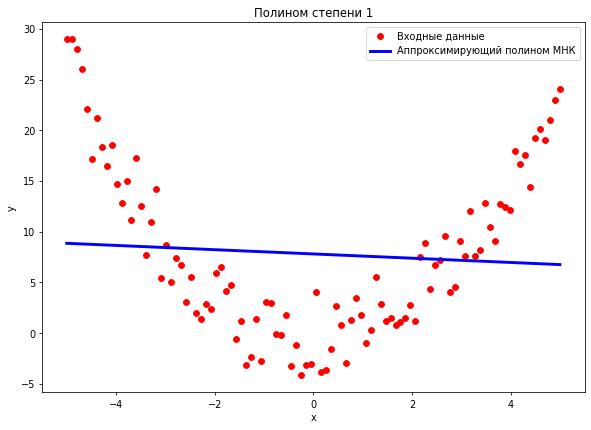

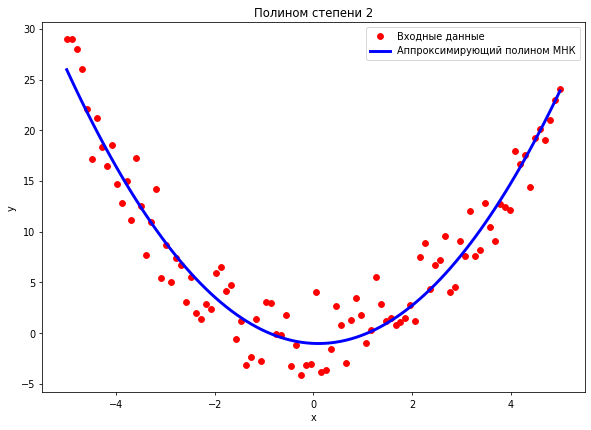

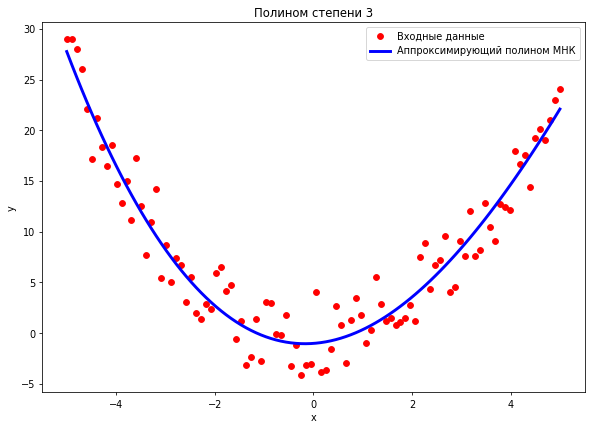

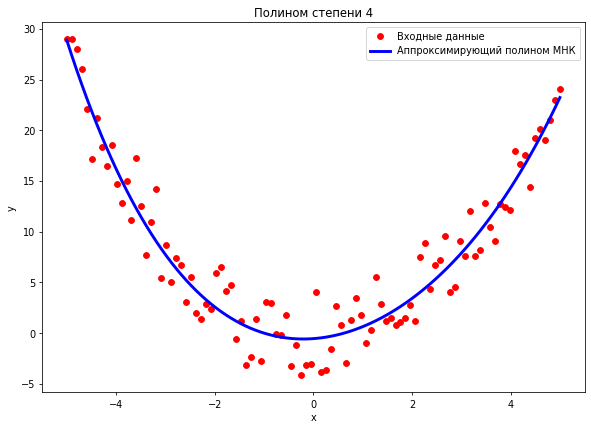

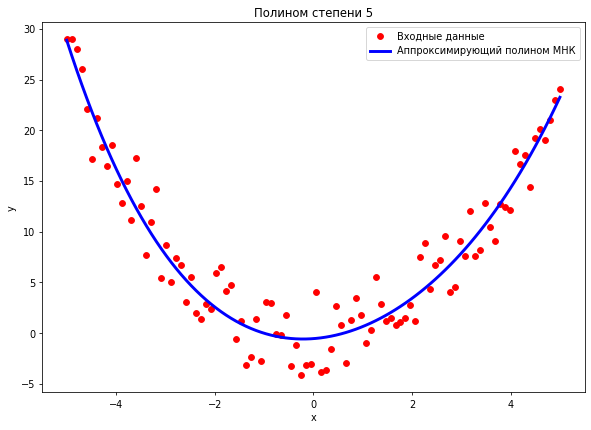

In [11]:
for i in range(1, 6):
    least_squares(a=-5, b=5, m=100, poly_degree=i, figure=1, show_info=1)

## 1.2. Обобщение МНК

![img](./images/20.png)

Приравнивая частные производные к нулю и объединяя коэффициенты при $a_i$, приходим к $\textbf{системе линейных уравнений}$, которую можно записать в виде:

![image](./images/21.png)

![image](./images/22.png)

У $(5.3.35) \; \exists !$ решение $\Leftrightarrow E: rang \; E = n + 1$. При $n \geq 5$ нормальные уравнения становятся очень плохо обусловленными, поэтому рассмотрим другой МНК - с помощью $\textbf{ортогональных многочленов}$

# 2.1. Ортогональные многочлены

![image](./images/30.png)

Если подставить $q_k(x)$ в уравнения $(5.2.35)$, получим

![image](./images/31.png)

то есть элементы, лежащие вне диагонали, зануляются

![image](images/311.png)

$(5.2.39)$ совпадает с полиномом МНК, полученным из нормальных уравнений, так как предполагается, что среди $x_1,\dots,x_m$ имеется $\geq n+1$ различных точки, так что у задачи $\exists !$ решение.
Итак, $\exists !$ полином $$p(x) = a_0 + a_1x +\dots+a_nx^n \; :\; (deg(p(x))\leq n) \; \& \; \left(\displaystyle\sum_{i=1}^{n}(p(x_i)-f_i)^2 \to \displaystyle\min_{a_0,\dots,a_n}\right)$$

Отрогональные полиномы позволяют значительно упростить систему, но теперь нужно как-то искать эти $q_i(x)$

## 2.2. Построение ортогональных полиномов

![image](./images/40.png)

При выполнении $(5.2.46)$ полиномы $q_{j+1}(x) \; \bot \; q_k(x) \; \forall k<j-1 \Rightarrow$ имеем алгоритм!!

![image](./images/41.png)

![image](./images/42.png)

## Построим МНК 1й степени с помощью ортог. пол., $a_0q_0(x) + a_1q_1(x)$

In [186]:
from sympy import *
nodes = [0, 1/4, 1/12, 3/4, 1]
f_vals = [1, 2, 1, 0, 1]


def build_ortogonal(nodes, i, x=None):
    """Построение q_0, q_1"""
    q_i = 1
    if x == None:
        x = Symbol('x')
        if i != 0:
            nodes = nodes
            q_i = (x - sum(nodes) / len(nodes))
    elif arg != None:
        if i != 0:
            nodes = nodes
            q_i = (x - sum(nodes) / len(nodes))
    return q_i

In [187]:
def build_coeffs_ak(nodes, i):
    q_k = build_ortogonal(nodes=nodes, i=i)
    numenator, denumenator = 0, 0
    print('q_{0} = {1}'.format(i, q_k))
    if i == 0:
        a_k = sum(f_vals) / len(nodes)
        return a_k
    else:
        for j in range(len(nodes)):
            numenator += build_ortogonal(nodes=nodes, i=i, x=nodes[j]) * f_vals[j]
            denumenator += build_ortogonal(nodes=nodes, i=i, x=nodes[j])**2
    a_k = numenator / denumenator
    return a_k

In [188]:
print(build_coeffs_ak(nodes=nodes, i=1))

q_1 = x - 0.416666666666667
-0.6545454545454544


In [189]:
def build_alpha(nodes, j):
    alpha_j = 0 
    if j == 1:
        alpha_j = sum(nodes) / len(nodes)
        return alpha_j
    elif j > 1:
        
        numenator, denumenator = 0, 0
        for ii in range(len(nodes)):
            numenator += nodes[ii]*(build_ortogonal(nodes=nodes, i=j-1, x=nodes[ii]))**2
            denumenator += (build_ortogonal(nodes=nodes, i=j-1, x=nodes[ii]))**2
        alpha_j = numenator / denumenator
    return alpha_j

$q_j(x) := xq_{j-1}(x)-\alpha_{j}q_{j-1}(x) - \beta_{j-1}q_{j-2}(x)$

In [172]:
def build_qj(nodes, j, x=None):
    """j > 2"""
    q_j = 0
    if j == 0 or j == 1:
        return build_ortogonal(nodes=nodes, i=j, x=None)
    else:
        if x == None:
            x = Symbol('x')
            nodes = nodes
            q_j_m_1 = build_ortogonal(nodes=nodes, i=j-1, x=None)
            q_j_m_2 = build_ortogonal(nodes=nodes, i=j-2, x=None)
            alpha_j_m_1 = build_alpha(nodes=nodes, j=j)
            q_j = x * q_j_m_1 - alpha_j_m_1 * q_j_m_1
        elif arg != None:
            nodes = nodes
            q_j = (x - sum(nodes) / len(nodes))
    return cancel(q_j)

In [193]:
build_qj(nodes=nodes, j=1, x=None)

x - 0.416666666666667

In [190]:
print(build_alpha(nodes=nodes, j=1))

0.41666666666666663


In [139]:
def build_beta(nodes, j):
    beta_j = 0
    num, denum = 0, 0
    if j == 1:
        for i in range(len(nodes)):
            q_1 = build_ortogonal(nodes=nodes, i=1)
            num += (nodes[i] * q_1.subs(arg, nodes[i]))
            beta_j = num / len(nodes)
        return beta_j 
    else:
        for i in range(len(nodes)):
            q_j = build_ortogonal(nodes=nodes, i=j)
            q_j_m1 = build_ortogonal(nodes=nodes, i=j-1)
            num += nodes[i] * q_j.subs(arg, nodes[i]) * q_j_m1.subs(arg, nodes[i])
            denum += (q_j_m1.subs(arg, nodes[i]))**2
            beta_j = num / len(nodes)
        return beta_j 

In [141]:
print(build_beta(nodes=nodes, j=0))

AttributeError: 'int' object has no attribute 'subs'

![image](./images/52.png)